---
title: "Wave equation in 1d"
author: "Kevin Silberberg"
date: "Oct 09, 2024"
jupyter: julia-1.10
format: revealjs
---

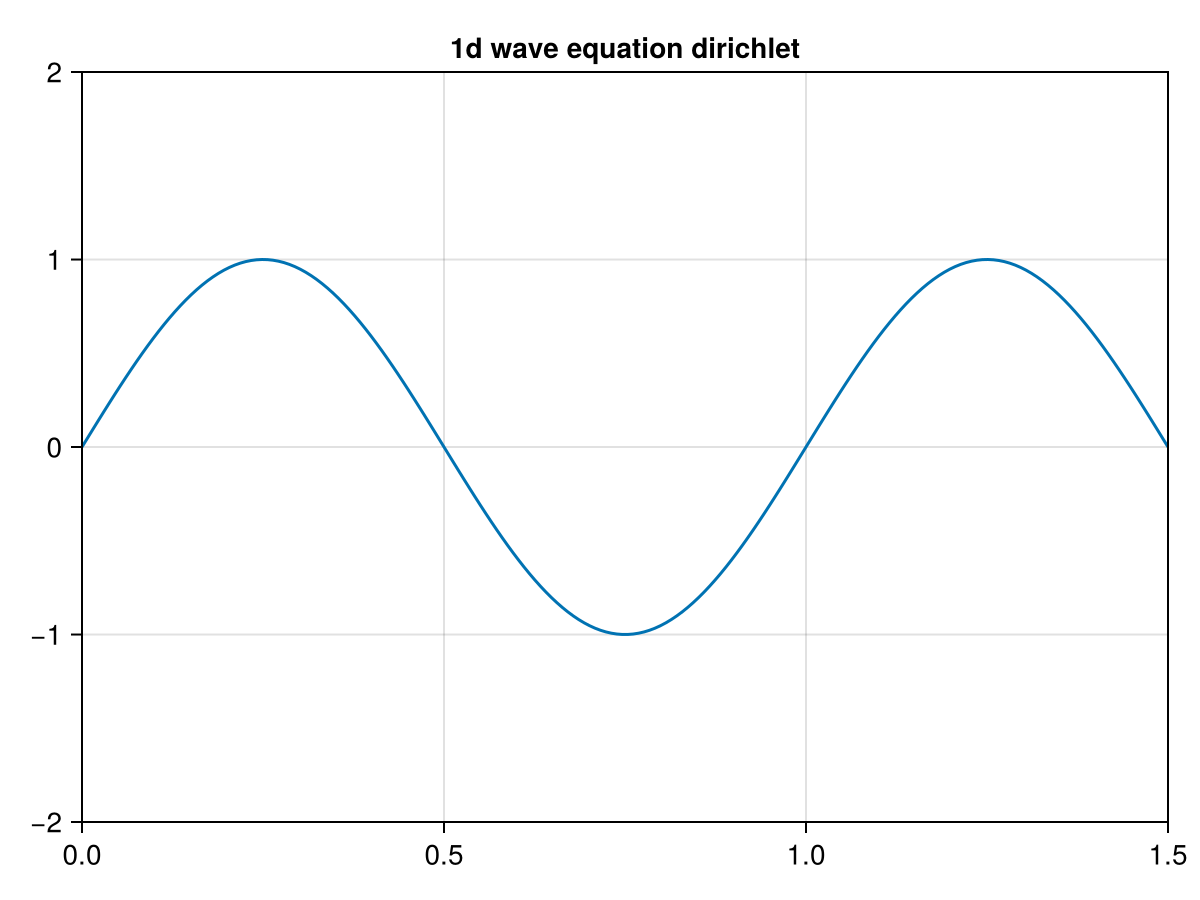

In [1]:
using CairoMakie
using QuadGK
set_theme!()

function makeplot(L)
    fig = Figure();
    ax = Axis(fig[1,1], title = "1d wave equation dirichlet")
    xlims!(ax, 0, L)
    ylims!(ax, -2, 2)
    return fig, ax
end

function main()
    L = 1.5;
    c = 1.0;
    N = 20;
    f(x) = sin(3*π*x/L)

    x = range(0, L, length = 200)

    a = zeros(N)
    ω = zeros(N)

    for n = 1:N
        a[n] = (2/L) * quadgk(x -> f(x) * sin(n * π * x / L), 0, L)[1]
        ω[n] = (n * π * c) / L
    end
    string = Observable(Point2f.(x, f.(x)))
    fig, ax = makeplot(L)
    lines!(ax, string)
    display(fig)

    for t ∈ range(0, 20, length = 1000)
        y = zeros(length(x))
        for j ∈ eachindex(x)
            sum = 0.0
            for n ∈ eachindex(a)
                sum += a[n]*sin((n * π * x[j]) / L)*cos(ω[n]*t)
            end
            y[j] = sum
        end
        string[] = Point2f.(x, y)
    end
end

main();